In [50]:
import pandas as pd

In [51]:
df = pd.read_csv('Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [52]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [53]:
import numpy as np

In [54]:
new_df=df.replace(0,np.nan)

In [55]:
new_df.isna().sum()

R&D Spend          2
Administration     0
Marketing Spend    3
State              0
Profit             0
dtype: int64

In [56]:
from sklearn.impute import SimpleImputer

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
le = LabelEncoder()
new_df['State'] = le.fit_transform(df['State'])

In [59]:
imputer = SimpleImputer(strategy='mean')
imputed_arr = imputer.fit_transform(new_df)

In [60]:
new_df = pd.DataFrame(imputed_arr,columns=new_df.columns)

In [61]:
new_df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [62]:
df=new_df

In [63]:
import seaborn as sns

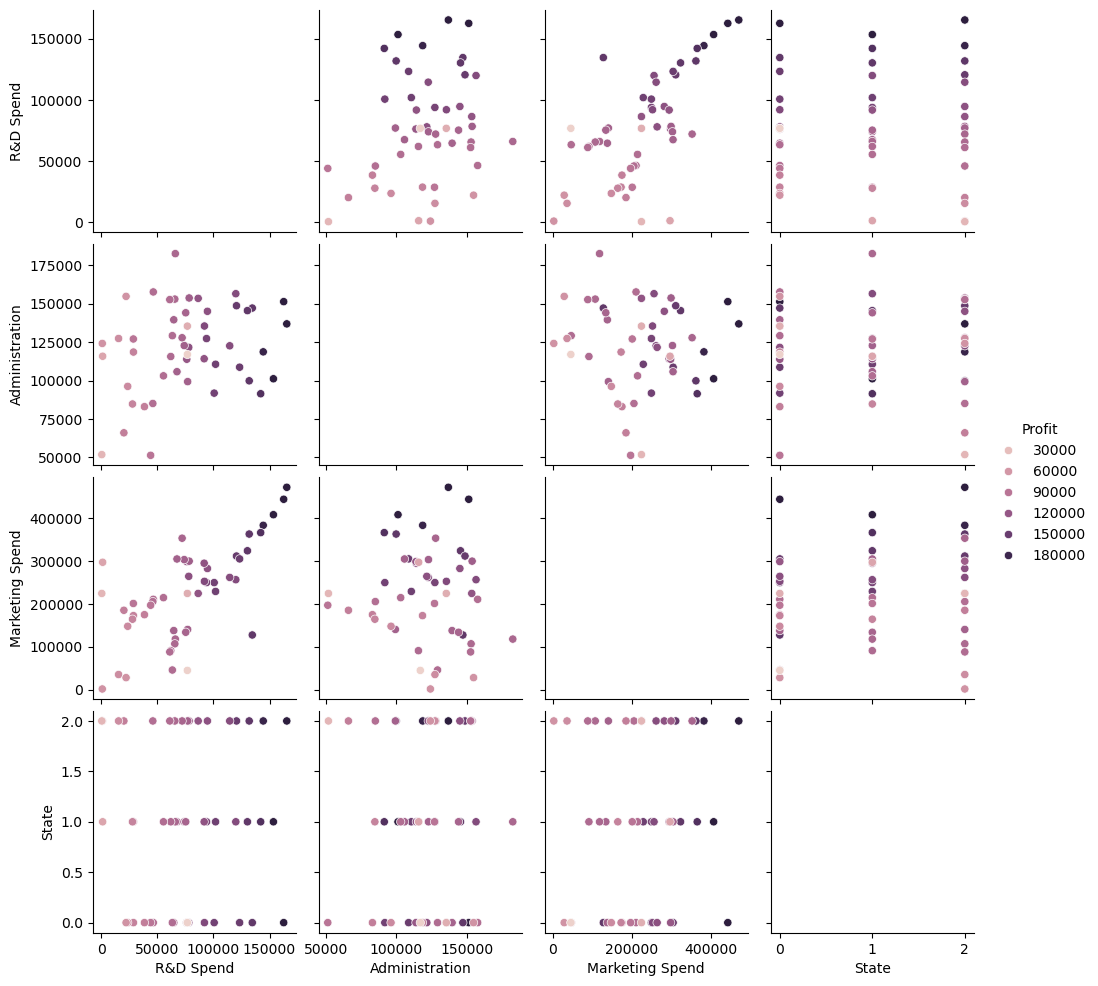

In [64]:
sns.pairplot(df, hue='Profit')

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X=df.drop('Profit',axis=1)
y=df['Profit']

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=30)

In [69]:
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)

LinearRegression()

In [70]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [71]:
y_pred_lr_train = model_lr.predict(X_train)
y_pred_lr_test = model_lr.predict(X_test)

In [72]:
def evaluation_preds(y_true,y_pred):
    print(r2_score(y_true,y_pred))
    print(mean_absolute_error(y_true,y_pred))
    print(mean_squared_error(y_true,y_pred))

In [73]:
print("Train Evaluation for Linear Regression")
evaluation_preds(y_train,y_pred_lr_train)
print("\n\nTest Evaluation for Linear Regression")
evaluation_preds(y_test,y_pred_lr_test)

Train Evaluation for Linear Regression
0.7951753089434699
13648.258896274807
419388613.0686743


Test Evaluation for Linear Regression
0.768971611741063
9006.650114034575
110278030.005273
